# sklearn.neighbors.KNeighborsClassifier

[官方手册](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[算法原理](https://scikit-learn.org/stable/modules/neighbors.html#classification)

[K近邻法(KNN)原理小结](https://www.cnblogs.com/pinard/p/6061661.html)

[scikit-learn K近邻法类库使用小结](https://www.cnblogs.com/pinard/p/6065607.html)

> 在scikit-learn 中，与近邻法这一大类相关的类库都在sklearn.neighbors包之中。KNN分类树的类是KNeighborsClassifier，KNN回归树的类是KNeighborsRegressor。除此之外，还有KNN的扩展，即限定半径最近邻分类树的类RadiusNeighborsClassifier和限定半径最近邻回归树的类RadiusNeighborsRegressor， 以及最近质心分类算法NearestCentroid。在这些算法中，KNN分类和回归的类参数完全一样。限定半径最近邻法分类和回归的类的主要参数也和KNN基本一样。比较特别是的最近质心分类算法，由于它是直接选择最近质心来分类，所以仅有两个参数，距离度量和特征选择距离阈值.

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)

**parameters:**

n_neightbors:Number of neighbors to use by default for kneighbors queries.


**Attributes:**

classes_: array of shape (n_classes,),Class labels known to the classifier

**methods:**

kneighbors(): Finds the K-neighbors of a point.

In [1]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
# 注意传参的列表结构
print(neigh.predict([[1.1]]))

print(neigh.predict_proba([[0.9]]))

[0]
[[ 0.66666667  0.33333333]]


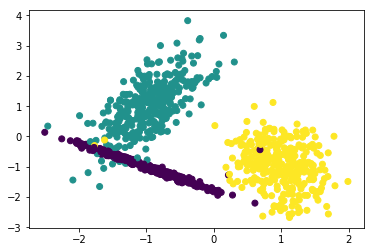

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_classification
# X为样本特征，Y为样本类别输出， 共1000个样本，每个样本2个特征，输出有3个类别，没有冗余特征，每个类别一个簇
X, Y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                             n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y)
plt.show()

In [4]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors = 15 , weights='distance')
clf.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='distance')

Text(0.5,1,"3-Class classification (k = 15, weights = 'distance')")

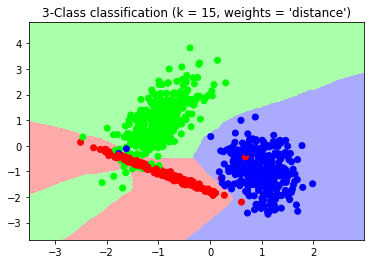

In [5]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#确认训练集的边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#生成随机数据来做测试集，然后作预测
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# 画出测试集数据
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# 也画出所有的训练集数据
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = 15, weights = 'distance')" )